# Analyse des resultats du cnap 2016

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
candidats = pd.read_excel("fichierCorrige/candidatsAddedValue.xlsx")

In [5]:
candidats = candidats[candidats.nom.isnull() == False] #Deletes last useless lines
candidats = candidats[candidats.year.isnull() == False]

In [6]:
candidats["age"] = 2016-candidats.year # Scientific age: years since the Ph.D. defense.
set(candidats.age)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14}

In [33]:
femmes = candidats[candidats.genre == 1]
hommes = candidats[candidats.genre == -1]

## Age distribution of candidates

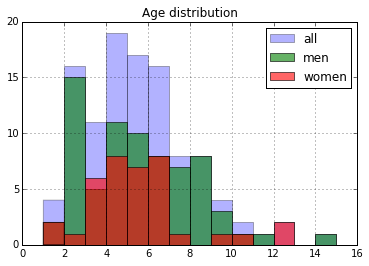

In [35]:
nBins = np.max(candidats.age)-np.min(candidats.age)+1
yRange = (np.min(candidats.age),np.max(candidats.age)+1)
candidats.age.hist(bins=nBins, range=yRange, label="all", alpha=0.3)
hommes.age.hist(bins=nBins, range=yRange, label="men", alpha=0.6)
femmes.age.hist(bins=nBins, range=yRange, label="women", alpha=0.6)
plt.legend(loc='upper right')
plt.title("Age distribution")

#### Note that this age distribution of very different for women and men:
#### At PhD+2, there is 1 woman for 15 men (would be interesting to understand this: selection effet or application bias?)
#### Between PhD+3 and PhD+6, there is more or less a similar number of man and women (with an advantage for men)
#### After PhD+7, there are almost no women.

### Age comparisons

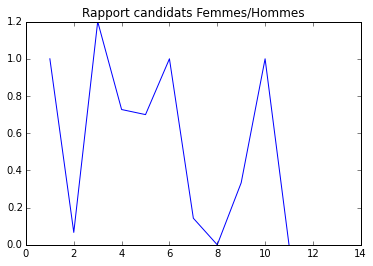

In [38]:
histF = np.histogram(femmes.age, bins=nBins, range=yRange)
histH = np.histogram(hommes.age, bins=nBins, range=yRange)
if np.sum(histF[1]-histH[1])!=0: # Catching error, just in case
    print "error here"
histFsurH = histF[0] / histH[0].astype(float)
#print len(histF[1][0:-1])
#print len(histFsurH)
plt.plot(histF[1][0:-1], histFsurH)
plt.title("Rapport candidats Femmes/Hommes")

In [39]:
fAge3 = np.sum(femmes.age<3)
hAge3 = np.sum(hommes.age<3)

print "Nombre d'hommes en dessous de these+3 : ", hAge3
print "Nombre de femmes en dessous de these+3 : ", fAge3
print "Proportion de femmes en dessous de these+3 : ", fAge3/float(hAge3+fAge3)

Nombre d'hommes en dessous de these+3 :  17
Nombre de femmes en dessous de these+3 :  3
Proportion de femmes en dessous de these+3 :  0.15


In [40]:
fAge36 = np.sum((femmes.age>=3) & (femmes.age<=6))
hAge36 = np.sum((hommes.age>=3) & (hommes.age<=6))

print "Nombre d'hommes entre these+3 et +6 : ", hAge36
print "Nombre de femmes entre these+3 et +6 : ", fAge36
print "Proportion de femmes entre these+3 et +6 : ", fAge36/float(hAge36+fAge36)

midH = hommes[(hommes.age>=3) & (hommes.age<=6)]
midF = femmes[(femmes.age>=3) & (femmes.age<=6)]

print "Age moyen pour ces hommes: ", midH.age.mean()
print "Age moyen pour ces femmes: ", midF.age.mean()

Nombre d'hommes entre these+3 et +6 :  34
Nombre de femmes entre these+3 et +6 :  29
Proportion de femmes entre these+3 et +6 :  0.460317460317
Age moyen pour ces hommes:  4.61764705882
Age moyen pour ces femmes:  4.58620689655


In [41]:
fAge7 = np.sum(femmes.age>=7)
hAge7 = np.sum(hommes.age>=7)

print "Nombre d'hommes apres these+6 : ", hAge7
print "Nombre de femmes apres these+6 : ", fAge7
print "Proportion de femmes apres these+6 : ", fAge7/float(hAge7+fAge7)

Nombre d'hommes apres these+6 :  21
Nombre de femmes apres these+6 :  5
Proportion de femmes apres these+6 :  0.192307692308


## Age distribution of successful candidates

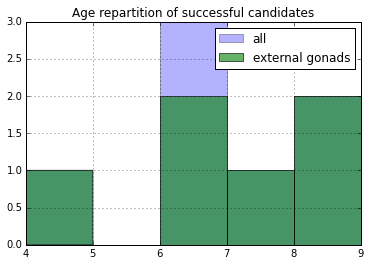

In [42]:
admis = candidats[candidats.admis == 1]
nBins = np.max(admis.age)-np.min(admis.age)+1
yRange = (np.min(admis.age),np.max(admis.age)+1)
admis.age.hist(bins=nBins, range=yRange, label="all", alpha=0.3)
admis[admis.genre == -1].age.hist(bins=nBins, range=yRange, label="external gonads", alpha=0.6)
plt.title("Age repartition of successful candidates")
plt.legend()

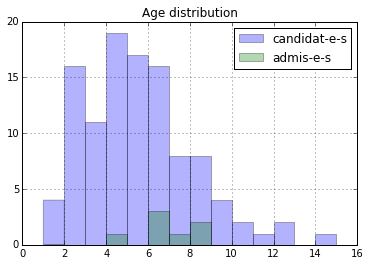

In [43]:
nBins = np.max(candidats.age)-np.min(candidats.age)+1
yRange = (np.min(candidats.age),np.max(candidats.age)+1)
candidats.age.hist(bins=nBins, range=yRange, label="candidat-e-s", alpha=0.3)
admis.age.hist(bins=nBins, range=yRange, label="admis-e-s", alpha=0.3)
plt.legend(loc='upper right')
plt.title("Age distribution")

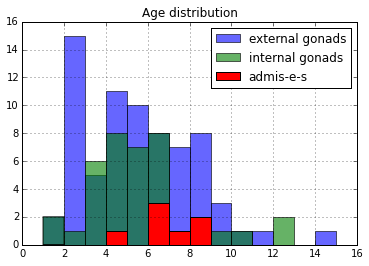

In [44]:
nBins = np.max(candidats.age)-np.min(candidats.age)+1
yRange = (np.min(candidats.age),np.max(candidats.age)+1)
candidats[candidats.genre == -1].age.hist(bins=nBins, range=yRange, label="external gonads", alpha=0.6)
candidats[candidats.genre == 1].age.hist(bins=nBins, range=yRange, label="internal gonads", alpha=0.6)
admis.age.hist(bins=nBins, range=yRange, label="admis-e-s", alpha=1.)
plt.legend(loc='upper right')
plt.title("Age distribution")